<a href="https://colab.research.google.com/github/ETHNHUNT/AIG_Deep_Learning/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2: Implementing a Simple Convolutional Neural Network (CNN)

## Introduction

In this project, you will design, implement, and evaluate a simple Convolutional Neural Network (CNN) from scratch. This will involve building the entire pipeline, from data preprocessing to model training and evaluation.

## Objectives

1. Set up TensorFlow or PyTorch environments. You are free to choose your preferred DL platform.
2. Use GPU for training.
3. Create a data loader and implement data preprocessing where needed.
4. Design a Convolutional Neural Network.
5. Train and evaluate your model. Make sure to clearly show loss and accuracy values. Include visualizations too.
6. Answer assessment questions.

## Dataset

You are free to choose any dataset for this project! Kaggle would be a good source to look for datasets. Below are some examples:
- CIFAR-10: A dataset of 60,000 32x32 color images in 10 classes with 6,000 images per class.
- MNIST: A dataset of 70,000 28x28 grayscale images of handwritten digits (0-9).
- Fashion-MNIST: A dataset of 70,000 28x28 grayscale images of 10 different clothing caregories.


In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

#Check if GPU is available or not
print("TensorFlow version:", tf.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))

#Load and Preprocess the data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print("Dataset loaded successfully.")

# Normalize images to the range [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

input_shape = x_train.shape[1:]

# Convert labels to one-hot encoded vectors
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test  = keras.utils.to_categorical(y_test, num_classes)

# 3. Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu", padding="same"),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(num_classes, activation="softmax")
])

# Print the model summary
model.summary()

model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.1,
                    verbose=1)

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.2%}")

TensorFlow version: 2.18.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Dataset loaded successfully.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.3562 - loss: 1.7460 - val_accuracy: 0.5680 - val_loss: 1.1945
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5983 - loss: 1.1378 - val_accuracy: 0.6488 - val_loss: 0.9962
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6718 - loss: 0.9329 - val_accuracy: 0.6974 - val_loss: 0.8614
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7190 - loss: 0.7976 - val_accuracy: 0.7282 - val_loss: 0.8021
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7552 - loss: 0.7066 - val_accuracy: 0.7410 - val_loss: 0.7697
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7843 - loss: 0.6183 - val_accuracy: 0.7354 - val_loss: 0.7861
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8081 - loss: 0.5486 - val_accuracy: 0.7442 - val_loss: 0.7765
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8372 - loss: 0.4697 - val_accuracy: 0.

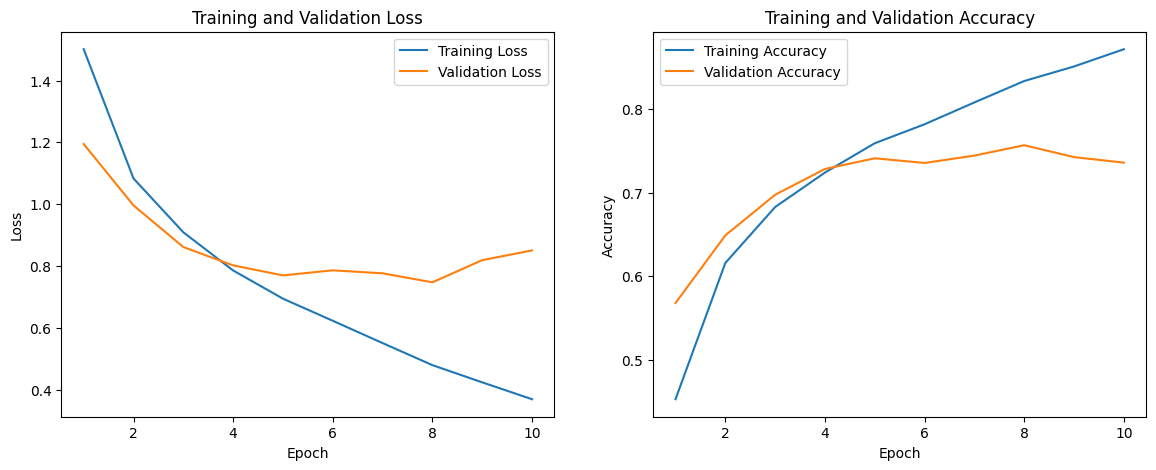

In [8]:
#Visualization
def plot_training_history(history):
    epochs_range = range(1, len(history.history['loss']) + 1)

    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, history.history['loss'], label='Training Loss')
    plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
    plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

plot_training_history(history)

In [9]:
#Preidctions
def plot_images(images, labels, predictions=None, class_names=None):
    plt.figure(figsize=(12, 6))

    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i])

        true_label = np.argmax(labels[i]) if labels.ndim > 1 else labels[i]
        title = f"Label: {class_names[true_label]}" if class_names else f"Label: {true_label}"

        if predictions is not None:
            predicted_label = np.argmax(predictions[i]) if predictions.ndim > 1 else predictions[i]
            title += f"\nPred: {class_names[predicted_label]}" if class_names else f"\nPred: {predicted_label}"

        plt.title(title)
        plt.axis("off")

    plt.tight_layout()
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


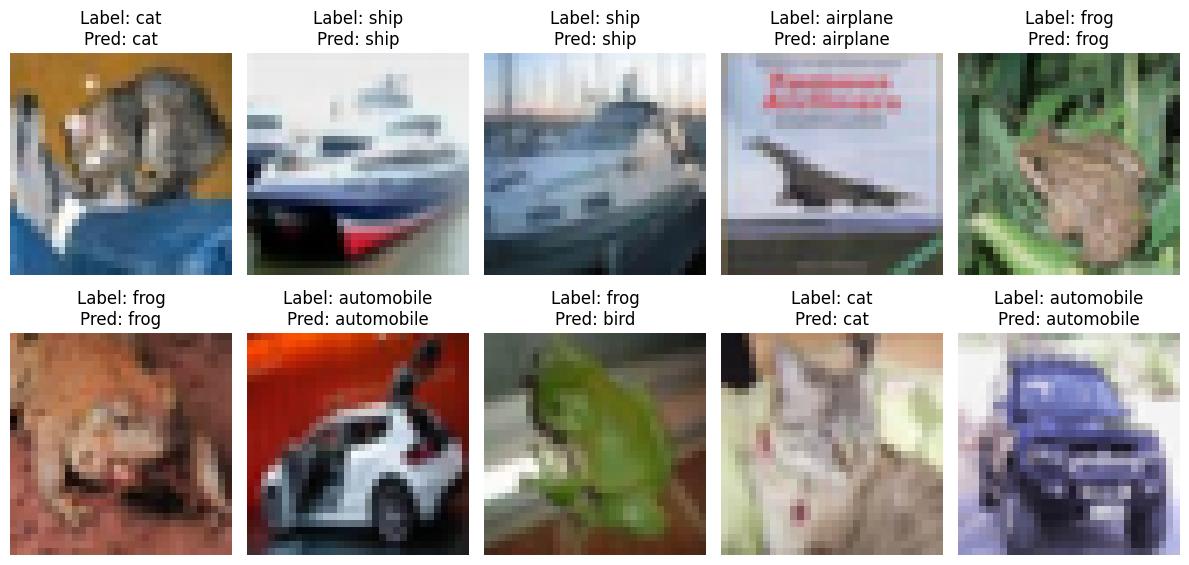

In [10]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

predictions = model.predict(x_test[:10])
plot_images(x_test[:10], y_test[:10], predictions, class_names)

---
### Questions
Answer the following questions in detail.

1. What is a Convolutional Neural Network (CNN)? Describe its key components and how they differ from those in a fully connected neural network.
2. Explain the purpose of the convolution operation in a CNN. How does the use of different filter sizes affect the feature maps?
3. What is the purpose of a pooling layer in a CNN, and how does it contribute to the network’s performance?
4. Why are activation functions important in CNNs? Compare the use of ReLU (Rectified Linear Unit) with other activation functions.
5. Describe the process of training a CNN. What are some common challenges faced during training?
6. What are some common evaluation metrics used to assess the performance of a CNN on a classification task?
7. How does data augmentation help improve the performance of a CNN? Provide examples of common data augmentation techniques.


# Answer-1:

CNN stands for Convolutional Neural Network which serves as a neural network type that specializes in analyzing images together with data that exists in grid-like structures. The system automatically extracts vital image features while you avoid selecting them manually.

## Key Components:

* Convolutional Layers:
The layers apply filters (also known as kernels) which detect local image patterns from edges to textures while traversing the image.
* Pooling Layers:
The pooling layers simplify image data (or feature map) size while maintaining essential features thus reducing network sensitivity to small modifications.
* Fully Connected Layers:
The network applies full connection layers as its last stage to determine outputs (such as image classification).

## Difference from Fully Connected Networks:
Fully connected networks establish complete connectivity between the neurons of one layer along with the neurons of the adjacent layer. The network fails to benefit from image pixel relationships where adjacent pixels are interconnected. The use of same filters throughout complete images enables CNNs to become more effective in image processing because they focus on local patterns.

# Answer-2:

**Purpose of CNN:**

The convolution operation enables networks to identify image features such as edges or corners within images. A small scanning window performs image analysis to detect essential points during its rapid movements across the image.


**Effect of Different Filter Sizes:**

* Small Filters (e.g., 3x3):
The computation process detects fine features from specific local parts of the image. The network uses multiple layers containing tiny filters to build its ability to identify large elaborate patterns in the image.
* Large Filters (e.g., 5x5 or 7x7):
The models detect complex patterns at once yet their calculation requirements are higher and they require more learning parameters.

The small filters serve as a detailed magnifying tool to observe fine image components just like filters of a larger size can obtain whole picture contents simultaneously.

# Answer-3:

**Purpose of Pooling Layers:**

Feature maps obtained from convolutional layers become smaller because of pooling layers. The network becomes speedier and it learns fewer parameters as a result of pooling.

**How It Contributes:**

* Simplifies Data:
The pooling operation scores data from nearby pixels which enables it to retain essential image elements while filtering out unimportant information through max pooling for instance.
* Makes the Model More Robust:
Level pooling introduces translation-invariant capabilities which cause minimal changes to the output even when an image undergoes slight repositioning.

Pooling is jsut a way of compressing an image without losing the important parts.

#Answer-4:

**Why Activation Functions are important in CNN:**

Activation functions bring non-linear elements into the network because complex pattern discovery requires these elements. The network becomes limited to detect basic linear patterns when activation functions are not available.

**ReLU vs. Other Activation Functions:**

ReLU (Rectified Linear Unit):

It is defined as f(x)=max(0,x). Relu stands out because it is an easy function yet accelerates learning speed as it prevents gradient disappearance throughout training. ReLU is most common in image tasks as it is fast and effective.

**Other Functions:**
* Sigmoid:
The input values of squashes transform into a bounded (0, 1) range while training potentially slows down because of tiny gradients which emerge from high input values.
* Tanh:
The output range of Tanh function matches that of sigmoid from -1 to 1. The function performs better data centering than sigmoid although it shares the gradient vanishing problem.
* Leaky ReLU:
Leaky ReLU represents an adjustment of ReLU which provides a small gradient measurement when negative inputs exist to prevent “dead neuron” issues.

# Answer-5:

###**Training Process**:

* **Data Preparation:**
Before training you need to normalize and resize your images while performing data augmentation if required.
* **Forward Pass:**
The network requires input images for prediction generation.
* **Loss Calculation:**
The actual labels get compared with predicted values through the implementation of a loss function that could use cross-entropy.
* **Backpropagation:**
The network receives gradients (errors) from the optimizer either as Adam or SGD to perform updates on its weights.
* **Iteration:**
Several epochs represent a complete dataset traversal which needs repetition for the process.

### **Common Challenges:**

* **Overfitting:**
  During training the model shows excellent efficacy yet exhibits inadequate performance with fresh data which has not been seen before.
* **Underfitting**:
The model does not represent the primary patterns within the data source.
* **Vanishing/Exploding Gradients:**
The gradients of deep neural networks face challenges because they tend to either vanish or experience explosion when processing deep layers. This affects training efficiency.
* **Hyperparameter Tuning:**
The process of determining suitable learning rates, batch sizes alongside appropriate numbers of layers typically proves difficult to execute.

#Answer-6:

The metric system enables you to assess both the accuracy frequency and specific performance aspects within classification tasks. The metrics are as follows:

### **Accuracy:**
The model recognizes correct examples in relation to the full collection of examples it receives.

###**Precision, Recall, and F1-Score:**
* Precision indicates the real positive predictions among all the predicted positives.

* Given all actual positive examples the ratio of true positive predictions indicates Sensitivity (Recall)

* The F1-Score calculates an averaged value through the precision and recall measurements to create a balanced scoring metric.

### **Confusion Matrix:**
A confusion matrix representation portrays the model evaluation results through a comparison between actual and predictive classes.
###**Area Under the ROC Curve (AUC-ROC):**
The metric helps models identify class distinctions primarily for binary classifications and extends to multi-class identification.
### **Log Loss (Cross-Entropy Loss):**
The model's ability to predict accurately determines the uncertainty level through comparison with actual labels.

#Answer-7:

###**How Data Augmentation Helps:**

* Prevents Overfitting:
    
    Artificial augmentation of the size and diversity in training data makes the model less prone to memorize training examples and overfit.

* Improves Generalization:
    
    The model achieves better real-world data resilience through exposure to different data variations obtained from transformations.

* Increases Data Diversity:
   
    The simulated data through augmentation helps the model understand how it will perform during practical scenarios when accessing data from diverse angles.

### **Common Data Augmentation Techniques:**

#### 1. **Geometric Transformations:**
* Rotation: Rotating images by a certain angle.
* Translation: Shifting images horizontally or vertically.
* Scaling/Zooming: It represents the technique that modifies the dimensions of visual objects within an image.
* Flipping: Imaging transformation technique involved in flipping because users can flip images either horizontally or vertically.

#### 2. **Color and Lighting Adjustments:**

* Brightness Adjustment: Modifying the brightness of images.
Adjusting contrast levels serves as one of the available techniques in the process.
* Saturation and Hue Changes: Modifying color properties.
* Noise Injection:
Random noise addition to digital photos serves as a technique to emulate sensor noise.
* Cropping and Padding:
Images are randomly cropped while padding surfaces are added to certain areas.

---
### Submission
Submit a link to your completed Jupyter Notebook (e.g., on GitHub (private) or Google Colab) with all the cells executed, and answers to the assessment questions included at the end of the notebook.